In [1]:
import json, time, tqdm
import random
import xml.etree.ElementTree as ET
import os
import lxml
import xmltodict
import json
import requests
from bs4 import BeautifulSoup

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
data_path = 'C:/Users/NK/WORK/kyc-10/Отчёт_Выгрузка_с_10-04-2019_по_26-06-2019.xlsx'
df_full = pd.read_excel(data_path)

In [5]:
df_full.head(10)

,ID заявки,компания,имя,фамилия,телефон,город,email,ИНН,ОГРН,адрес проживания,...,Перевод в статус Отказ клиента,источник заявки,utm source,utm medium,utm term,utm campaign,дата статуса в работу менеджера,время статуса в работу менеджера,автор перевода статуса в работу менеджера,история комментариев
0,360989,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЮДЖИ...",ЕВГЕНИЙ,ГАЛКИН,9195985347,Челябинск,zgalkin201545@gmail.com,4513008852,1194501000528,-,...,-,API_ANKETA,-,-,-,-,-,-,-,-
1,328820,ИП СИДЕЛЬНИКОВ ОЛЕГ НИКОЛАЕВИЧ,ОЛЕГ,СИДЕЛЬНИКОВ,9525408947,Воронеж,Oyma2008@yandex.ru,366515164695,309366825700173,СОВПАДАЕТ,...,-,API_ANKETA,-,-,-,-,-,-,-,n.bogdanovich:НЕ БЕРЕТ; front-chel:НЕ БЕРЕТ ТР...
2,236194,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КРОНОС""",АННА,ПАВЛОВА,9154413721,Москва,annapavlova94@inbox.ru,5024195397,1195081029472,-,...,-,API_TM_HOME,-,-,-,-,-,-,-,пока не успела; обещала прислать завтра докуме...
3,328852,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВОСТ...",ИВАН,АРХИПОВ,9858395102,Москва,vershina.2020@mail.ru,9718130732,1197746147400,-,...,-,API_TM_HOME,-,-,-,-,-,-,-,-
4,265398,-,-,-,9602391140,Санкт-Петербург,-,-,-,-,...,2019-05-14 10:09:27.348000,API_ANKETA,-,-,-,-,-,-,-,НЕ ОСТАВЛЯЛ ЗАЯВКУ;
5,304083,-,-,-,9504327442,Красноярск,-,-,-,-,...,2019-05-27 07:35:26.220000,API_ANKETA,google_ads,cpc,-,new_uslugi_kms_krasnoyarsk,-,-,-,"ОШИБКА, ФИЗ.ЛИЦО;"
6,328875,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",ИВАН,АРХИПОВ,9858395102,Москва,vershina.2020@mail.ru,7724471328,1197746247115,-,...,-,API_TM_HOME,-,-,-,-,-,-,-,-
7,361032,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГОР ...",МАНВЕЛ,БАГРАМЯН,9268860572,Москва,gorgrupp@gg.msk.ru,5024175915,1175024017585,-,...,-,API_ANKETA,-,-,-,-,-,-,-,-
8,420284,-,-,-,9992028169,Санкт-Петербург,-,-,-,-,...,2019-06-24 12:16:24.497000,API_ANKETA,-,-,-,-,-,-,-,k.zueva:не берет; k.zueva:ОШИБ;
9,302842,-,-,-,9999996098,Москва,-,-,-,-,...,2019-05-27 12:19:27.247000,API_ANKETA,google_ads,cpc,-,new_uslugi_kms_msk,-,-,-,ОШИБОЧНО;


In [ ]:
#reset all
df[['kyc_time','risk','sum_risk']]=0

In [7]:
df = pd.read_csv('./kyc_results/scoring_df.csv')
df.head(10)

,Unnamed: 0,ИНН,Контур балл,kyc_time,risk,sum_risk
0,0,4513008852,1.0,3.046801,1.00,1.60
1,1,366515164695,0.25,2.577163,0.20,0.20
2,2,5024195397,0.45,2.804014,0.55,0.55
3,3,9718130732,0.4,2.708886,0.55,0.55
4,4,-,-,0.000000,0.00,0.00
5,5,-,-,0.000000,0.00,0.00
6,6,7724471328,0.45,3.347793,0.35,0.35
7,7,5024175915,-,3.097698,1.00,1.50
8,8,-,-,0.000000,0.00,0.00
9,9,-,-,0.000000,0.00,0.00


In [8]:
import time
url = 'http://localhost:8080/api/companies/actions/scoring'

def kyc(inn):
    t = time.time()
    json_data = {'inn':inn,
                 "bankId": "56ed04b3-6e3c-4ab5-97b5-b217de57603c",
                 "modelId": "f07ad4fd-df60-4aac-969b-dbdc896e1283"}
    r_kyc = requests.post(url, json=json_data)
    result = r_kyc.json()
    with open('./kyc_results/'+inn+'.json', 'w') as f:
        json.dump(result, f)
    t2 = time.time()-t
    if result == {}:
        return t2, -1, -1, result
    risk = result['risk']
    sum_risk = result['sum_risk']
    return t2, risk, sum_risk, result


for i in range(df.shape[0])[0:200]:
    inn = df.loc[i,'ИНН']
    t = df.loc[i,'kyc_time']
    if (len(inn) == 10 or len(inn) == 12) and t==0:
        a, b, c, full_result = kyc(inn)
        df.loc[i,'kyc_time'], df.loc[i,'risk'], df.loc[i,'sum_risk'] = a,b,c
        print(i, inn, a, b, c)
    else:
        print(i, 'no inn or already scored')

0 no inn or already scored
1 no inn or already scored
2 no inn or already scored
3 no inn or already scored
4 no inn or already scored
5 no inn or already scored
6 no inn or already scored
7 no inn or already scored
8 no inn or already scored
9 no inn or already scored
10 no inn or already scored
11 no inn or already scored
12 no inn or already scored
13 no inn or already scored
14 no inn or already scored
15 no inn or already scored
16 no inn or already scored
17 no inn or already scored
18 no inn or already scored
19 no inn or already scored
20 no inn or already scored
21 no inn or already scored
22 no inn or already scored
23 no inn or already scored
24 no inn or already scored
25 no inn or already scored
26 no inn or already scored
27 no inn or already scored
28 no inn or already scored
29 no inn or already scored
30 no inn or already scored
31 no inn or already scored
32 no inn or already scored
33 no inn or already scored
34 no inn or already scored
35 no inn or already scored
36

In [9]:
df.loc[0:200][df['ИНН']!='-']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,ИНН,Контур балл,kyc_time,risk,sum_risk
0,0,4513008852,1.0,3.046801,1.00,1.60
1,1,366515164695,0.25,2.577163,0.20,0.20
2,2,5024195397,0.45,2.804014,0.55,0.55
3,3,9718130732,0.4,2.708886,0.55,0.55
6,6,7724471328,0.45,3.347793,0.35,0.35
7,7,5024175915,-,3.097698,1.00,1.50
10,10,470800108810,-,2.708125,0.15,0.15
12,12,0273900730,1.0,16.260482,1.00,2.40
13,13,9718131969,0.45,2.519042,0.45,0.45
14,14,780255849810,-,2.849471,0.25,0.25


In [10]:
#export results
df[['ИНН','Контур балл', 'kyc_time', 'risk', 'sum_risk']].to_csv('./kyc_results/scoring_df.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


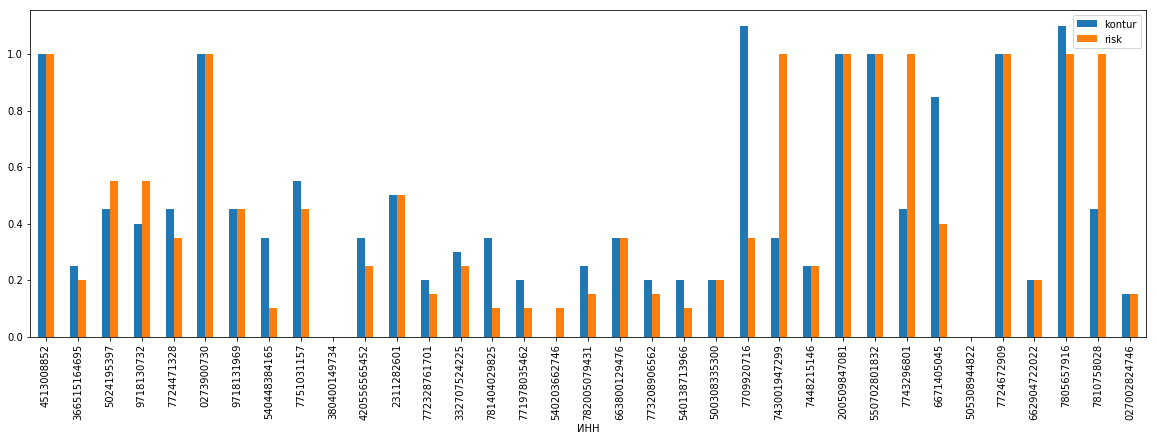

In [14]:
#сравнение контура и наших баллов
df_new = df[df['Контур балл']!='-']
df_new['kontur']=df_new['Контур балл'].astype(float)
df_new.loc[:100].plot.bar(x='ИНН',y=['kontur','risk'],figsize=(20,6))

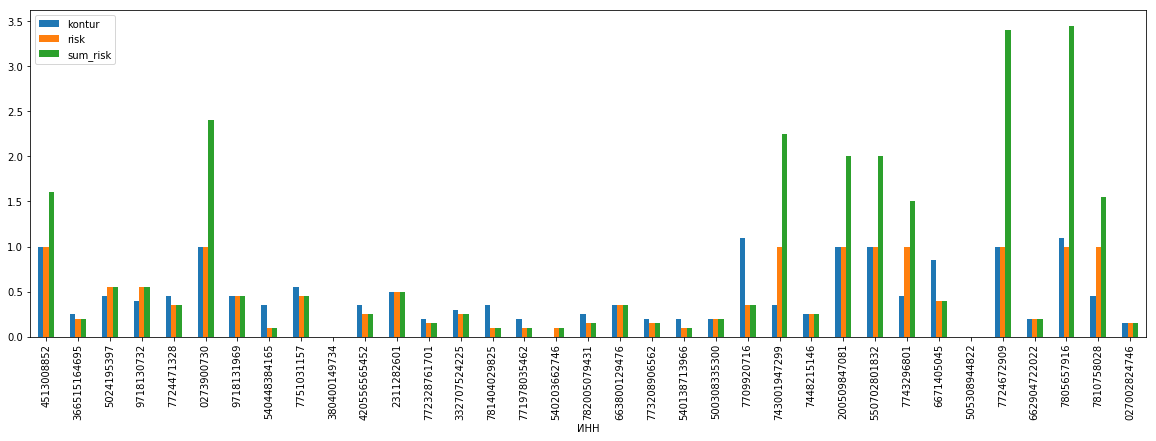

In [12]:
#то же но с учетом всей суммы рисков
df_new.loc[:100].plot.bar(x='ИНН',y=['kontur','risk', 'sum_risk'],figsize=(20,6))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


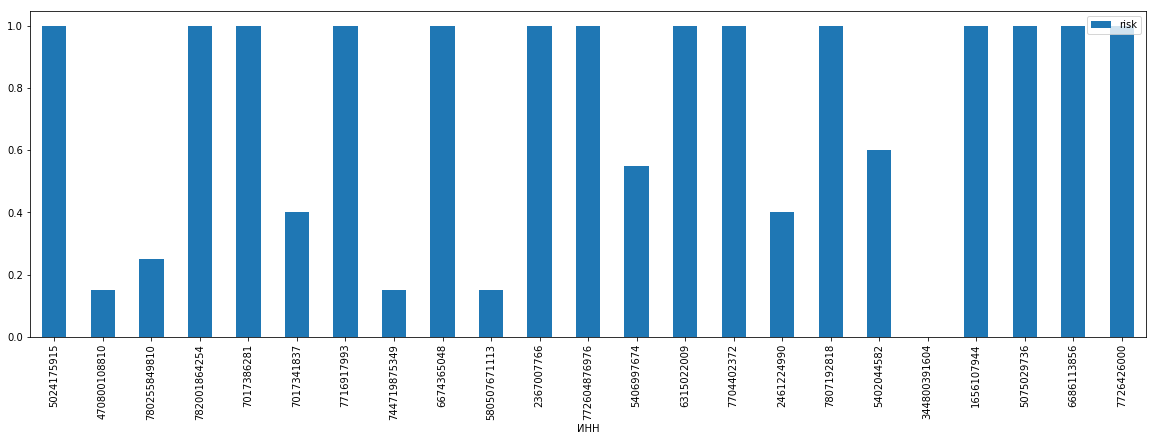

In [13]:
#то что контур не считал
df_new2 = df[df['Контур балл']=='-'][df['ИНН']!='-'][df['risk']>=0]
df_new2.loc[:100].plot.bar(x='ИНН',y=['risk'],figsize=(20,6))

5.637581491933285 4.0547611713409415


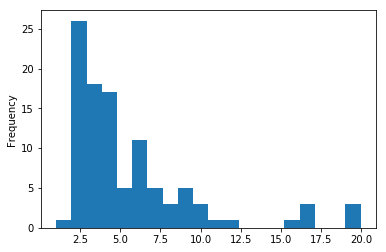

In [15]:
#распределение времени отклика сейчас
kyc_time = df[df['kyc_time']>0]['kyc_time']
kyc_time.plot.hist(bins=20)
print(kyc_time.mean(), kyc_time.median())

In [ ]:
#reset time to zero kontur<1 my_kyc=1 for repeat score
idx = df[df['Контур балл']!='-'][df_new['Контур балл'].astype(float)<1][df['risk']==1].index#['kyc_time']=0
df.loc[idx,'kyc_time']=0

#### выводы:
поправил 1. fss базы - проверять не только имя но и регион, так как kontur<1,kyc>=1
2. fss базы - возможно стоит проверять еще и адрес, так в одном регионе может быть много компаний с одинаковым именем (см. ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "СЕВЕРНАЯ СТОЛИЦА")
3. нельзя давать этой проверке 100 баллов так как она неоднозначна, как и ко всем подобным (найти такие)
4. нужно прогнать по всей таблице, чтоыб выявить возможные баги

#### еще требуется анализ:
1. импортировать в df все результаты из json, и получить частоту(количество True срабатываний проверки) появления проверок. Построить сравнение частоты с баллами проверки.
2. Можно ли рекомендовать на базе анализа перераспределение баллов?
3. Найти kontur=1, kyc<1 и обзвонить
4. Можно ли рекомендовать на базе анализа изменение или дополнение проверок?